In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random


In [2]:
# Set the path to the Tiny ImageNet dataset
dataset_path = 'tiny-imagenet-200'

# List the contents of the dataset directory
print("Contents of the Tiny ImageNet dataset directory:")
for item in os.listdir(dataset_path):
    item_path = os.path.join(dataset_path, item)
    if os.path.isdir(item_path):
        num_items = len(os.listdir(item_path))
        print(f"- {item}/ ({num_items} items)")
    else:
        print(f"- {item} ({os.path.getsize(item_path) / 1024:.1f} KB)")


Contents of the Tiny ImageNet dataset directory:
- test/ (1 items)
- train/ (200 items)
- train_tiny_imagenet_meta.pkl (13167.8 KB)
- val/ (2 items)
- val_parsed/ (200 items)
- val_tiny_imagenet_meta.pkl (627.5 KB)
- wnids.txt (2.0 KB)
- words.txt (2593.5 KB)


In [3]:
# Load class IDs and names
class_ids = []
with open(os.path.join(dataset_path, 'wnids.txt'), 'r') as f:
    class_ids = [line.strip() for line in f.readlines()]

# Try to load class names if available
class_names = {}
try:
    with open(os.path.join(dataset_path, 'words.txt'), 'r') as f:
        for line in f.readlines():
            parts = line.strip().split('\t')
            if len(parts) == 2:
                class_names[parts[0]] = parts[1]
except:
    print("Could not load class names from words.txt")

print(f"Total number of classes: {len(class_ids)}")
print(f"First 10 class IDs: {class_ids[:10]}")

# Show class names for the first 10 classes if available
if class_names:
    print("\nClass names for the first 10 classes:")
    for class_id in class_ids[:10]:
        name = class_names.get(class_id, "Unknown")
        print(f"{class_id}: {name}")


Total number of classes: 200
First 10 class IDs: ['n02124075', 'n04067472', 'n04540053', 'n04099969', 'n07749582', 'n01641577', 'n02802426', 'n09246464', 'n07920052', 'n03970156']

Class names for the first 10 classes:
n02124075: Egyptian cat
n04067472: reel
n04540053: volleyball
n04099969: rocking chair, rocker
n07749582: lemon
n01641577: bullfrog, Rana catesbeiana
n02802426: basketball
n09246464: cliff, drop, drop-off
n07920052: espresso
n03970156: plunger, plumber's helper


In [11]:
def view_image(image_path):
    """
    Display a single image from the Tiny ImageNet dataset
    
    Parameters:
    -----------
    image_path : str
        Path to the image file
    """
    try:
        # Open the image
        img = Image.open(image_path)
        
        # Get image information
        img_format = img.format
        img_mode = img.mode
        img_size = img.size
        
        # Display image information
        print(f"Image format: {img_format}")
        print(f"Image mode: {img_mode}")
        print(f"Image size: {img_size[0]} x {img_size[1]} pixels")
        
        # Display the image
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Image: {os.path.basename(image_path)}")
        plt.show()
        
        # Display pixel values (for small images)
        if img_size[0] * img_size[1] <= 64*64:  # Only for reasonably small images
            img_array = np.array(img)
            print(f"Image shape as array: {img_array.shape}")
            print(f"Pixel value range: {img_array.min()} to {img_array.max()}")
            
            # If it's a color image, show a sample of pixel values
            if len(img_array.shape) == 3 and img_array.shape[2] == 3:
                print("\nSample pixel values (RGB):")
                print(img_array[0:3, 0:3, :])
        
        return img
    
    except Exception as e:
        print(f"Error loading image: {e}")
        return None


Viewing a random image from the training set:
Class ID: n03733131
Class name: maypole
Image: n03733131_322.JPEG
Image format: JPEG
Image mode: RGB
Image size: 64 x 64 pixels


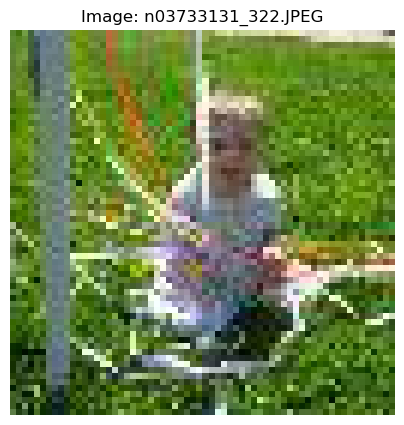

Image shape as array: (64, 64, 3)
Pixel value range: 0 to 255

Sample pixel values (RGB):
[[[ 86 130  45]
  [ 66 112  14]
  [115 158  69]]

 [[ 94 136  52]
  [ 87 131  34]
  [ 98 141  52]]

 [[ 89 131  49]
  [ 96 137  41]
  [ 96 136  48]]]


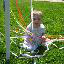

In [12]:
# View a random image from the training set
def view_random_image(dataset_path, split='train'):
    """
    Display a random image from the specified split of the dataset
    
    Parameters:
    -----------
    dataset_path : str
        Path to the Tiny ImageNet dataset
    split : str
        Dataset split ('train', 'val', or 'test')
    """
    split_path = os.path.join(dataset_path, split)
    
    if not os.path.exists(split_path):
        print(f"Split '{split}' does not exist at {split_path}")
        return
    
    # For training split, we need to navigate through class folders
    if split == 'train':
        # Get a random class folder
        class_folders = os.listdir(split_path)
        random_class = random.choice(class_folders)
        class_path = os.path.join(split_path, random_class)
        
        # Check if images are in an 'images' subfolder
        images_path = os.path.join(class_path, 'images')
        if os.path.exists(images_path):
            image_folder = images_path
        else:
            image_folder = class_path
            
        # Get a random image
        image_files = [f for f in os.listdir(image_folder) if f.endswith(('.JPEG', '.jpeg', '.jpg', '.png'))]
        if not image_files:
            print(f"No image files found in {image_folder}")
            return
            
        random_image = random.choice(image_files)
        image_path = os.path.join(image_folder, random_image)
        
        # Get class name if available
        class_name = class_names.get(random_class, random_class)
        print(f"Class ID: {random_class}")
        print(f"Class name: {class_name}")
        
    # For validation and test splits, structure might be different
    else:
        # Check if there are subfolders or direct images
        items = os.listdir(split_path)
        if any(os.path.isdir(os.path.join(split_path, item)) for item in items):
            # Has subfolders
            subfolders = [item for item in items if os.path.isdir(os.path.join(split_path, item))]
            random_folder = random.choice(subfolders)
            folder_path = os.path.join(split_path, random_folder)
            
            image_files = [f for f in os.listdir(folder_path) if f.endswith(('.JPEG', '.jpeg', '.jpg', '.png'))]
            if not image_files:
                print(f"No image files found in {folder_path}")
                return
                
            random_image = random.choice(image_files)
            image_path = os.path.join(folder_path, random_image)
            
            print(f"Folder: {random_folder}")
        else:
            # Direct images
            image_files = [f for f in items if f.endswith(('.JPEG', '.jpeg', '.jpg', '.png'))]
            if not image_files:
                print(f"No image files found in {split_path}")
                return
                
            random_image = random.choice(image_files)
            image_path = os.path.join(split_path, random_image)
    
    print(f"Image: {os.path.basename(image_path)}")
    return view_image(image_path)

# View a random training image
print("Viewing a random image from the training set:")
view_random_image(dataset_path, 'train')


Viewing specific image n03255030_12.JPEG from class n03255030:
Class ID: n03255030
Class name: dumbbell
Image format: JPEG
Image mode: RGB
Image size: 64 x 64 pixels


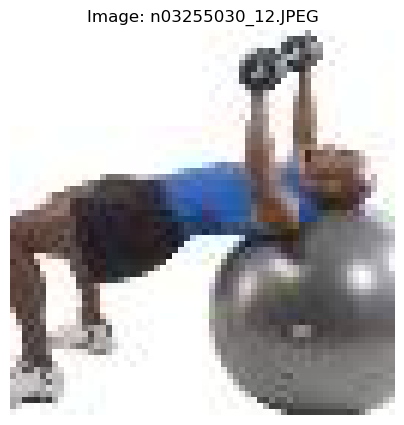

Image shape as array: (64, 64, 3)
Pixel value range: 14 to 255

Sample pixel values (RGB):
[[[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]]


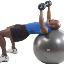

In [6]:
# Function to view a specific image by class ID and image name
def view_specific_image(dataset_path, class_id, image_name, split='train'):
    """
    Display a specific image from the dataset
    
    Parameters:
    -----------
    dataset_path : str
        Path to the Tiny ImageNet dataset
    class_id : str
        Class ID (e.g., 'n03255030')
    image_name : str
        Image filename (e.g., 'n03255030_12.JPEG')
    split : str
        Dataset split ('train', 'val', or 'test')
    """
    if split == 'train':
        # For training split, navigate through class folders
        class_path = os.path.join(dataset_path, split, class_id)
        
        if not os.path.exists(class_path):
            print(f"Class folder '{class_id}' does not exist in {split} split")
            return
        
        # Check if images are in an 'images' subfolder
        images_path = os.path.join(class_path, 'images')
        if os.path.exists(images_path):
            image_path = os.path.join(images_path, image_name)
        else:
            image_path = os.path.join(class_path, image_name)
    else:
        # For validation and test splits, structure might be different
        # This is a simplified approach - adapt based on your dataset structure
        image_path = os.path.join(dataset_path, split, image_name)
    
    if not os.path.exists(image_path):
        print(f"Image '{image_name}' not found at {image_path}")
        return
    
    # Get class name if available
    class_name = class_names.get(class_id, class_id)
    print(f"Class ID: {class_id}")
    print(f"Class name: {class_name}")
    
    return view_image(image_path)

# Example: View a specific image
# Replace with actual class ID and image name from your dataset
class_id = "n03255030"  # Example class ID
image_name = "n03255030_12.JPEG"  # Example image name

print(f"Viewing specific image {image_name} from class {class_id}:")
view_specific_image(dataset_path, class_id, image_name)


Viewing 5 random images from class n03255030:
Class ID: n03255030
Class name: dumbbell


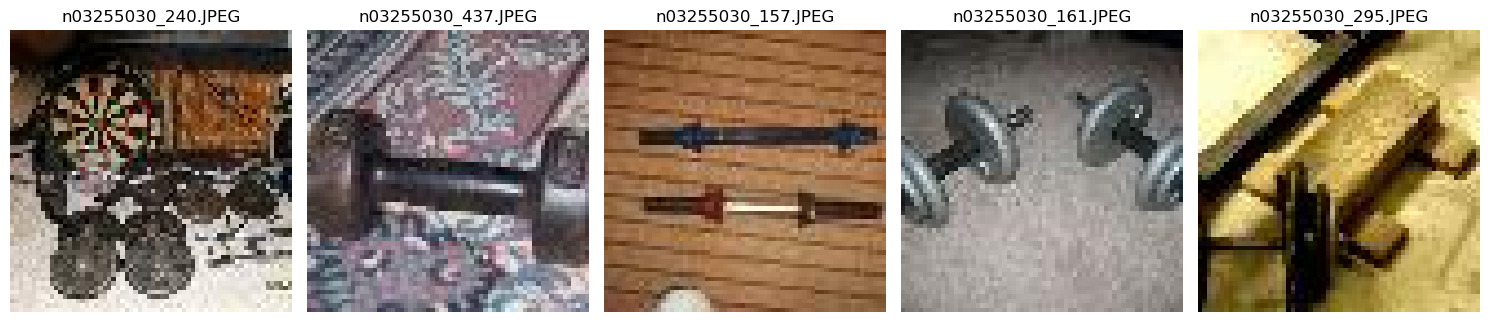

['n03255030_240.JPEG',
 'n03255030_437.JPEG',
 'n03255030_157.JPEG',
 'n03255030_161.JPEG',
 'n03255030_295.JPEG']

In [7]:
# Function to display multiple images from a specific class
def view_class_images(dataset_path, class_id, num_images=5, split='train'):
    """
    Display multiple images from a specific class
    
    Parameters:
    -----------
    dataset_path : str
        Path to the Tiny ImageNet dataset
    class_id : str
        Class ID (e.g., 'n03255030')
    num_images : int
        Number of images to display
    split : str
        Dataset split ('train', 'val', or 'test')
    """
    if split == 'train':
        # For training split, navigate through class folders
        class_path = os.path.join(dataset_path, split, class_id)
        
        if not os.path.exists(class_path):
            print(f"Class folder '{class_id}' does not exist in {split} split")
            return
        
        # Check if images are in an 'images' subfolder
        images_path = os.path.join(class_path, 'images')
        if os.path.exists(images_path):
            image_folder = images_path
        else:
            image_folder = class_path
            
        # Get all image files
        image_files = [f for f in os.listdir(image_folder) if f.endswith(('.JPEG', '.jpeg', '.jpg', '.png'))]
        if not image_files:
            print(f"No image files found in {image_folder}")
            return
        
        # Get class name if available
        class_name = class_names.get(class_id, class_id)
        print(f"Class ID: {class_id}")
        print(f"Class name: {class_name}")
        
        # Select random images if there are more than requested
        if len(image_files) > num_images:
            selected_images = random.sample(image_files, num_images)
        else:
            selected_images = image_files
            
        # Display the images in a grid
        fig, axes = plt.subplots(1, min(num_images, len(selected_images)), figsize=(15, 5))
        
        # Handle case where only one image is displayed
        if num_images == 1 and len(selected_images) == 1:
            axes = [axes]
            
        for i, image_file in enumerate(selected_images):
            if i >= num_images:
                break
                
            image_path = os.path.join(image_folder, image_file)
            img = Image.open(image_path)
            
            axes[i].imshow(img)
            axes[i].set_title(f"{image_file}")
            axes[i].axis('off')
            
        plt.tight_layout()
        plt.show()
        
        return selected_images
    else:
        print(f"Viewing multiple images from {split} split is not implemented")
        return None

# Example: View multiple images from a specific class
class_id = "n03255030"  # Example class ID
print(f"Viewing 5 random images from class {class_id}:")
view_class_images(dataset_path, class_id, num_images=5)


In [8]:
# Function to search for a class by keyword
def search_class(dataset_path, keyword):
    """
    Search for classes containing the keyword in their name
    
    Parameters:
    -----------
    dataset_path : str
        Path to the Tiny ImageNet dataset
    keyword : str
        Keyword to search for in class names
    """
    if not class_names:
        print("Class names are not available. Cannot search by keyword.")
        return []
    
    # Convert keyword to lowercase for case-insensitive search
    keyword = keyword.lower()
    
    # Search for classes containing the keyword
    matching_classes = []
    for class_id, name in class_names.items():
        if keyword in name.lower():
            matching_classes.append((class_id, name))
    
    # Print results
    if matching_classes:
        print(f"Found {len(matching_classes)} classes matching '{keyword}':")
        for class_id, name in matching_classes:
            print(f"  {class_id}: {name}")
    else:
        print(f"No classes found matching '{keyword}'")
    
    return matching_classes

# Example: Search for classes containing "dog"
search_results = search_class(dataset_path, "dog")

# If classes are found, display images from the first matching class
if search_results:
    first_match = search_results[0][0]  # Get the class ID of the first match
    print(f"\nShowing images from the first matching class ({first_match}):")
    view_class_images(dataset_path, first_match, num_images=3)


Found 179 classes matching 'dog':
  n00041614: boondoggle
  n00294366: dogtrot
  n00519492: dog show
  n00570572: dog paddle
  n00915574: dog breeding
  n00971802: dogfight
  n00974224: dogfight
  n01172441: hassle, scuffle, tussle, dogfight, rough-and-tumble
  n01411556: Oedogoniales, order oedogoniales
  n01411727: Oedogoniaceae, family Oedogoniaceae
  n01411871: Oedogonium, genus Oedogonium
  n01491874: dogfish
  n01492357: smooth dogfish
  n01492708: American smooth dogfish, Mustelus canis
  n01493541: spiny dogfish
  n01493829: Atlantic spiny dogfish, Squalus acanthias
  n01494041: Pacific spiny dogfish, Squalus suckleyi
  n01632952: waterdog
  n01779148: wood tick, American dog tick, Dermacentor variabilis
  n02084071: dog, domestic dog, Canis familiaris
  n02084732: pooch, doggie, doggy, barker, bow-wow
  n02085118: pariah dog, pye-dog, pie-dog
  n02085272: lapdog
  n02085374: toy dog, toy
  n02085936: Maltese dog, Maltese terrier, Maltese
  n02087122: hunting dog
  n02087551: h